<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K61_SVM_XT_AT_Total_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [26]:

import numpy as np
from sklearn.svm import SVR 
from sklearn import linear_model
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
from glob import glob

In [27]:
path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

In [28]:
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_at = data['AT'].values
  data_total_at = data['TOTAL_AT'].values

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_at[k])
      
      temp_3D.append(temp_2D)
      data_output1D.append(data_total_at[k])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape((len(x_train)*3,2))
y_train = y_train.reshape(-1,1)
y_train = np.ravel(y_train)

print(x_train.shape,y_train.shape)
print(x_train[:4],y_train[:4])

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
(273, 2) (273,)
[[0.13 4.  ]
 [0.17 5.  ]
 [0.24 6.  ]
 [0.17 5.  ]] [22 22 22 22]


In [29]:
test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values 
ip_test_at = test['AT'].values
test_output = test['TOTAL_AT'].values

x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_at[k])
    
    temp_3D.append(temp_2D)
    data_output1D.append(test_output[k])

  data_input2D.append(temp_3D)
x_input.append(data_input2D)
y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0)
y_output = np.concatenate( y_output, axis=0)

x_test = np.asarray(x_input)
y_test = np.asarray(y_output)

x_test = x_input.reshape((len(x_input)*3,2))
y_test = y_test.reshape(-1,1)
y_test = np.ravel(y_test)

print(x_test.shape,y_test.shape)
print(x_test, y_test)

(48, 2) (48,)
[[ 0.16  4.  ]
 [ 0.21  5.  ]
 [ 0.26  6.  ]
 [ 0.21  5.  ]
 [ 0.26  6.  ]
 [ 0.3   7.  ]
 [ 0.26  6.  ]
 [ 0.3   7.  ]
 [ 0.36  8.  ]
 [ 0.3   7.  ]
 [ 0.36  8.  ]
 [ 0.42  9.  ]
 [ 0.36  8.  ]
 [ 0.42  9.  ]
 [ 0.47 10.  ]
 [ 0.42  9.  ]
 [ 0.47 10.  ]
 [ 0.54 11.  ]
 [ 0.47 10.  ]
 [ 0.54 11.  ]
 [ 0.61 12.  ]
 [ 0.54 11.  ]
 [ 0.61 12.  ]
 [ 0.68 13.  ]
 [ 0.61 12.  ]
 [ 0.68 13.  ]
 [ 0.74 14.  ]
 [ 0.68 13.  ]
 [ 0.74 14.  ]
 [ 0.8  15.  ]
 [ 0.74 14.  ]
 [ 0.8  15.  ]
 [ 0.85 16.  ]
 [ 0.8  15.  ]
 [ 0.85 16.  ]
 [ 0.89 17.  ]
 [ 0.85 16.  ]
 [ 0.89 17.  ]
 [ 0.92 18.  ]
 [ 0.89 17.  ]
 [ 0.92 18.  ]
 [ 0.95 19.  ]
 [ 0.92 18.  ]
 [ 0.95 19.  ]
 [ 0.98 20.  ]
 [ 0.95 19.  ]
 [ 0.98 20.  ]
 [ 1.   21.  ]] [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]


In [23]:
C_2d_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
gamma_2d_range = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
classifiers = []

for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVR(kernel='rbf', C=C, gamma=gamma)
        clf.fit(x_train, y_train)
        classifiers.append((C, gamma, clf))
max_acc = 0
best_C = 0
best_gamma = 0

for (k, (C, gamma, clf)) in enumerate(classifiers):
  # print(C, gamma,clf.predict(x_test))
  # print(C, gamma)
  result = clf.predict(x_test)
  acc = 0
  for i in range(y_test.size):
    acc += (1- abs(y_test[i]-result[i])/y_test[i])*100
  print(acc / y_test.size)
  if(max_acc!=max(max_acc,acc / y_test.size)):
    max_acc = max(max_acc,acc / y_test.size)
    best_C = C
    best_gamma = gamma

print("MAX acc:", max_acc, ", BEST C: ",best_C, ", BEST_gamma: ", best_gamma)


94.76190476190965
94.76190476214624
94.76190476430763
94.76190478599534
94.76190500278283
94.7619071684387
94.7619286330231
94.76212523051629
94.76303580719542
94.76276775825686
94.76216408385748
94.76189605997848
94.76195605592436
94.76195028719849
94.76193650942277
94.76193650793648
94.76193650793648
94.76193650793648
94.76193650793648
94.76193650793648
94.7619047619534
94.76190476431758
94.76190478593298
94.76190500281108
94.76190717068452
94.76192882724469
94.76214347308762
94.76410944801968
94.7732152148094
94.77053472542622
94.76449798143176
94.76181774264178
94.76241770210038
94.76236001484234
94.76222223708527
94.7622222222222
94.7622222222222
94.7622222222222
94.7622222222222
94.7622222222222
94.76190476239117
94.7619047860321
94.7619050021871
94.76190717096777
94.76192884970226
94.76214541530265
94.76429187373351
94.78395162305361
94.87500929095133
94.84820439711858
94.78783695717482
94.76103456927501
94.76703416386168
94.76645729128069
94.76507951371013
94.76507936507939
94.

actually:  [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
model:  [19.1412726  20.0997117  21.0861223  20.0997117  21.0861223  21.52778015
 21.0861223  21.52778015 21.28395493 21.52778015 21.28395493 19.86678272
 21.28395493 19.86678272 19.52990181 19.86678272 19.52990181 20.76972476
 19.52990181 20.76972476 20.77831964 20.76972476 20.77831964 20.79395535
 20.77831964 20.79395535 19.80905008 20.79395535 19.80905008 20.84205675
 19.80905008 20.84205675 19.61273928 20.84205675 19.61273928 21.12887952
 19.61273928 21.12887952 20.98799796 21.12887952 20.98799796 22.05195765
 20.98799796 22.05195765 21.36534913 22.05195765 21.36534913 19.94274792]


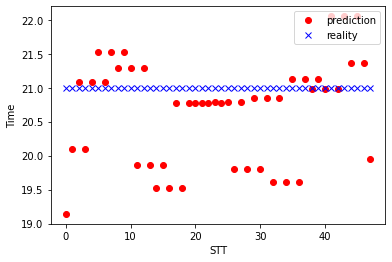

pecent:  [91.1489171241024, 95.7129128439987, 99.58989381352352, 95.7129128439987, 99.58989381352352, 97.48676119057426, 99.58989381352352, 97.48676119057426, 98.64783366696963, 97.48676119057426, 98.64783366696963, 94.60372722318078, 98.64783366696963, 94.60372722318078, 92.99953243067456, 94.60372722318078, 92.99953243067456, 98.90345125922602, 92.99953243067456, 98.90345125922602, 98.94437925702813, 98.90345125922602, 98.94437925702813, 99.0188349820694, 98.94437925702813, 99.0188349820694, 94.3288099213178, 99.0188349820694, 94.3288099213178, 99.24788926269977, 94.3288099213178, 99.24788926269977, 93.39399658182373, 99.24788926269977, 93.39399658182373, 99.38628800102637, 93.39399658182373, 99.38628800102637, 99.94284743426114, 99.38628800102637, 99.94284743426114, 94.99067784924772, 99.94284743426114, 94.99067784924772, 98.2602422382022, 94.99067784924772, 98.2602422382022, 94.96546628289644]
accuracy:  97.05240546233894


In [24]:
model = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

model.fit(x_train, y_train)

result = model.predict(x_test)
test_output = y_test
plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.xlabel("STT")
plt.ylabel("Time")
print("actually: ",test_output.reshape(test_output.size))
print("model: ", result)


plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

percent = []
acc = 0

for i in range(y_test.size):
  p = (1- abs(y_test[i]-result[i])/test_output[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))